### Step one: Importing libraries

In [1]:
#importing libraries
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA #  reduce dimensionality
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

### Step two: Loading the dataset

In [2]:
data = pd.read_csv(r"Loan_default.csv")
data.sample()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
195106,4NGGN28IJK,68,104012,52484,800,48,4,7.02,12,0.38,High School,Self-employed,Single,Yes,No,Education,No,0


### Step three: Exploring the dataset

In [3]:
data.shape                                # Check the number of records and attributes contained in the dataset
data.isnull().sum().sum()                 # Check the number of null values

print(f"There are {data.shape[0]} records and {data.shape[1]} attributes in the dataset")
print('')
print(f"There are {data.isnull().sum().sum()} null values in the dataset")

There are 255347 records and 18 attributes in the dataset

There are 0 null values in the dataset


In [4]:
# Check the data types of all the attributes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [5]:
# Further explore the dataset using the 5-point summary

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


Age                  Axes(0.125,0.11;0.0731132x0.77)
Income            Axes(0.212736,0.11;0.0731132x0.77)
LoanAmount        Axes(0.300472,0.11;0.0731132x0.77)
CreditScore       Axes(0.388208,0.11;0.0731132x0.77)
MonthsEmployed    Axes(0.475943,0.11;0.0731132x0.77)
NumCreditLines    Axes(0.563679,0.11;0.0731132x0.77)
InterestRate      Axes(0.651415,0.11;0.0731132x0.77)
LoanTerm          Axes(0.739151,0.11;0.0731132x0.77)
DTIRatio          Axes(0.826887,0.11;0.0731132x0.77)
dtype: object

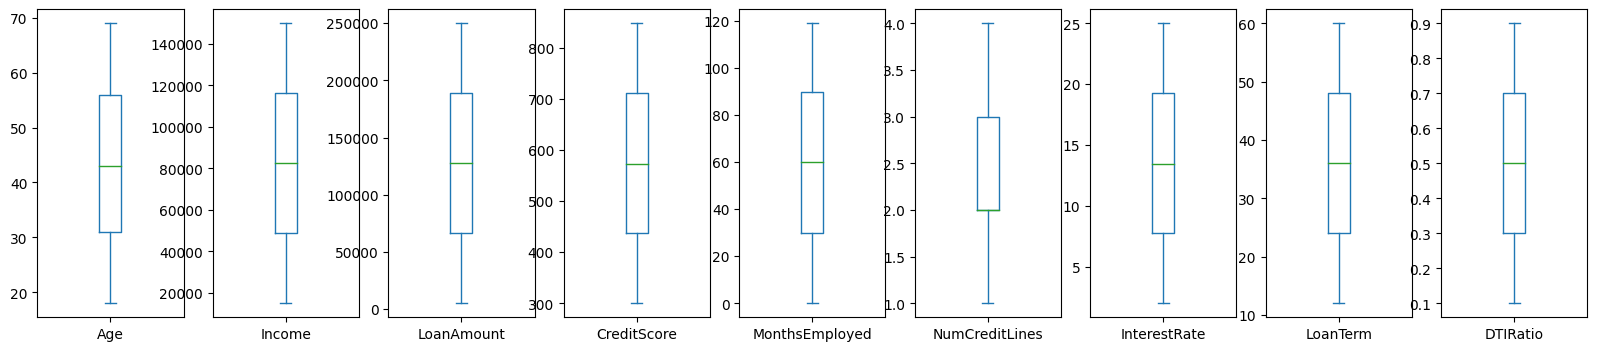

In [6]:
#Checking for outliers using Boxplots

col = [ 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

data[col].plot(
    kind = 'box',
    figsize = (20,4),
    subplots = True
)

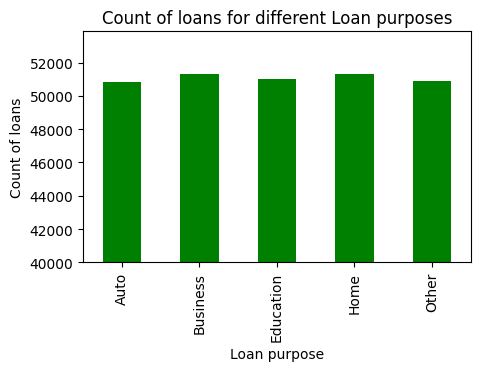

In [7]:
Loan_purpose = data.groupby('LoanPurpose')['LoanID'].count()

Loan_purpose.plot(
    kind   = 'bar',
    color  = 'green',
    figsize = (5,3),
    title  = 'Count of loans for different Loan purposes',
    ylabel = 'Count of loans',
    xlabel = 'Loan purpose',
    ylim   = (40000, None));

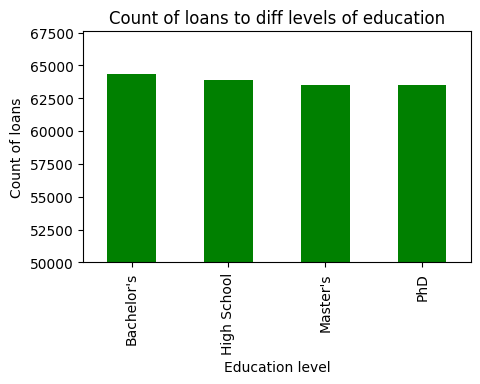

In [8]:
education = data.groupby('Education')['LoanID'].count()
education.plot(
    kind = 'bar',
    color = 'green',
    figsize = (5,3),
    title = 'Count of loans to diff levels of education',
    ylabel = 'Count of loans',
    xlabel = 'Education level',
    ylim   = (50000, None));

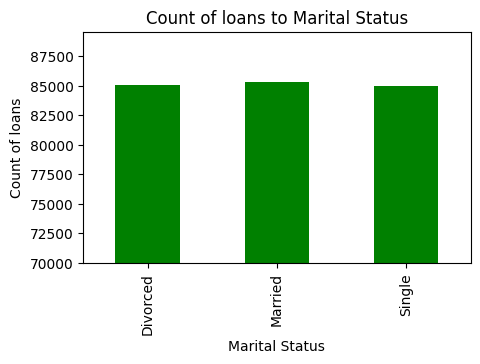

In [9]:
marital = data.groupby('MaritalStatus')['LoanID'].count()

marital.plot(
    kind = 'bar',
    color = 'green',
    figsize = (5,3),
    title = 'Count of loans to Marital Status',
    ylabel = 'Count of loans',
    xlabel = 'Marital Status',
    ylim   = (70000, None));

EmploymentType
Full-time        63656
Part-time        64161
Self-employed    63706
Unemployed       63824
Name: LoanID, dtype: int64


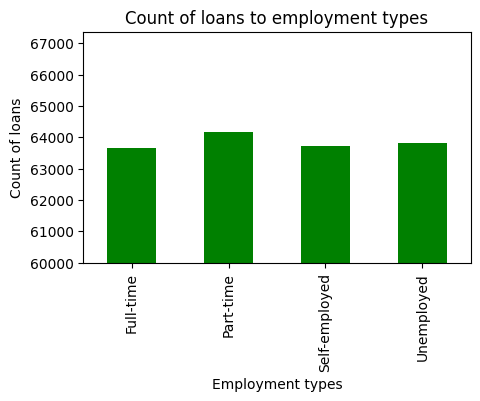

In [10]:
employment = data.groupby('EmploymentType')['LoanID'].count()

print(employment)
fig, ax = plt.subplots(figsize=(5, 3))

employment.plot(
    kind='bar',
    color='green',
    ax=ax
)

ax.set_title('Count of loans to employment types')
ax.set_ylabel('Count of loans')
ax.set_xlabel('Employment types')
ax.set_ylim(60000, None)  # Set the y-axis limit

plt.show()

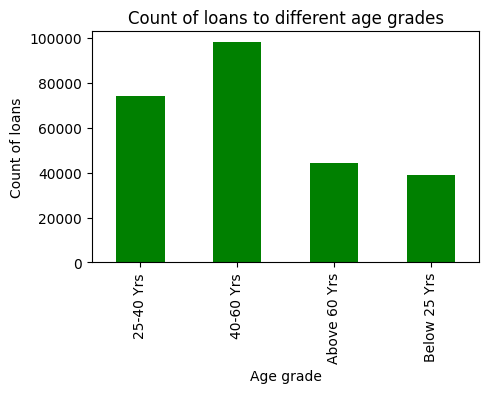

In [11]:
def age_grade(df):
    age_level = []
    for i in df:
        if i > 60:
            age_level.append('Above 60 Yrs')
        elif 40 < i <= 60:
            age_level.append('40-60 Yrs')
        elif 25 < i <= 40:
            age_level.append('25-40 Yrs')
        else:
            age_level.append('Below 25 Yrs')
    return age_level

data['Age_class'] = age_grade(data['Age'])

age_class = data.groupby('Age_class')['LoanID'].count()
age_class.plot(
    kind = 'bar',
    color = 'green',
    figsize = (5,3),
    title = 'Count of loans to different age grades',
    ylabel = 'Count of loans',
    xlabel = 'Age grade');

In [12]:
# Check for number of unique records using Loan IDs and the top ten loan ids

print(f"There are {data['LoanID'].nunique()} unique loans")
print('')
top = data.groupby('LoanID')['LoanAmount'].sum().sort_values(ascending=False)[:10]
print('Top ten loans collected:')
print(top)


There are 255347 unique loans

Top ten loans collected:
LoanID
BZ6O5YSSA8    249999
TGYZ4AXW7H    249998
VIS6H9YBJM    249997
7OV9HHSV62    249996
INBGJEMBW3    249993
RXGEJP7QPL    249993
T81D0AKB24    249992
TE1MRP009B    249990
PVLUX5GH5X    249989
OFQMCX2Z37    249988
Name: LoanAmount, dtype: int64


In [13]:
# Check for correlation among all the data attributes

data.corr(numeric_only=True)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127,0.000263,-0.004689,-0.167783
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303,-0.000998,0.000205,-0.099119
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291,0.002538,0.001122,0.086659
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436,0.001130,-0.001039,-0.034166
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096,-0.001166,0.001765,-0.097374
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297,-0.000226,-0.000586,0.028330
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000,0.000892,0.000575,0.131273
LoanTerm,0.000263,-0.000998,0.002538,0.001130,-0.001166,-0.000226,0.000892,1.000000,0.002273,0.000545
DTIRatio,-0.004689,0.000205,0.001122,-0.001039,0.001765,-0.000586,0.000575,0.002273,1.000000,0.019236
Default,-0.167783,-0.099119,0.086659,-0.034166,-0.097374,0.028330,0.131273,0.000545,0.019236,1.000000


In [14]:
#Lets look at the

data = data.drop(['LoanID','Age_class'], axis='columns')

### Step four: Data Preprocessing

In [15]:
#Lets look at the unique values of the categorical fields in the dataframe.

for col in data:
  if data[col].dtype == "object":
    print(f"{col}: {data[col].unique()}")

Education: ["Bachelor's" "Master's" 'High School' 'PhD']
EmploymentType: ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
MaritalStatus: ['Divorced' 'Married' 'Single']
HasMortgage: ['Yes' 'No']
HasDependents: ['Yes' 'No']
LoanPurpose: ['Other' 'Auto' 'Business' 'Home' 'Education']
HasCoSigner: ['Yes' 'No']


In [16]:
# this scripts looks at all our categorical fields that contain either yes or no and replaces their value with 1 and 0 respectively

for column in data:
    if data[column].dtype == 'object' and set(data[column].unique()) == {'Yes', 'No'}:
        data[column] = data[column].map({'Yes': 1, 'No': 0})

In [17]:
# Check for remaining categorical columns to be encoded

for column in data:
    if data[column].dtype == 'object':
        print(f'{column}: {data[column].unique()}')


Education: ["Bachelor's" "Master's" 'High School' 'PhD']
EmploymentType: ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
MaritalStatus: ['Divorced' 'Married' 'Single']
LoanPurpose: ['Other' 'Auto' 'Business' 'Home' 'Education']


In [37]:
# Encode Categorical columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Education_n']      = le.fit_transform(data['Education'])
data['EmploymentType_n'] = le.fit_transform(data['EmploymentType'])
data['MaritalStatus_n']  = le.fit_transform(data['MaritalStatus'])
data['LoanPurpose_n']    = le.fit_transform(data['LoanPurpose'])
data[data['Education_n']  == 2].sample()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Education_n,EmploymentType_n,MaritalStatus_n,LoanPurpose_n
250137,0.411765,0.100371,0.205654,0.759563,0.731092,0.666667,0.616087,24,0.325,Master's,Full-time,Single,1,0,Home,1,0,2,0,2,3


In [19]:
# Split dataset into target variable named y and independent variables named x

data = data.dropna()
x = data.drop(['Education','EmploymentType','MaritalStatus','LoanPurpose','Default'], axis = 1)
y = data.Default
pd.set_option('display.max_columns', None)        #This will ensure that all the data attributes are displayed

x.head(4)                                       #Display first five samples of the data to see the encoded variables

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,HasDependents,HasCoSigner,Education_n,EmploymentType_n,MaritalStatus_n,LoanPurpose_n
0,56,85994,50587,520,80,4,15.23,36,0.44,1,1,1,0,0,0,4
1,69,50432,124440,458,15,1,4.81,60,0.68,0,0,1,2,0,1,4
2,46,84208,129188,451,26,3,21.17,24,0.31,1,1,0,2,3,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0,0,0,1,0,1,1


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

col = ['InterestRate', 'DTIRatio','Age','Income','LoanAmount','CreditScore','MonthsEmployed','NumCreditLines']
data[col] = scaler.fit_transform(data[col])

### Step five: Model selection, testing and evaluation

In [21]:
!pip install xgboost
import xgboost

In [22]:
# Split the dataset into train and test sets

x_train,x_test,y_train,y_test = train_test_split(x, y, train_size=0.7)
x_train.shape

(178742, 16)

##### Step five - i: Modelling using supervised learning algo

In [23]:
# Now, let us define the models
models = {
    'Logistic Regression': LogisticRegression(C = 10, solver = 'liblinear'),
    'Random Forest': RandomForestClassifier(criterion = 'entropy', n_estimators = 100),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XG Boost': xgboost.XGBClassifier(objective="binary:logistic", random_state=42)
}

# Also, we will initiate an empty dataframe to store our metrics
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Then, we will loop through the models to train, make predictions, and calculate the metrics
for model_name, model in models.items():
    # Training the model
    model.fit(x_train, y_train)

    # Predict
    y_pred = model.predict(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # create dictionary with results
    results_dict = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Store metrics in results_df
    results_df = pd.concat([results_df, pd.DataFrame([results_dict])], ignore_index=True)
    # as at new release of pandas, the append function has been removed

# # Print out results dataframe
# print("\nMetrics Comparison")
# print(results_df)
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.884955,0.638889,0.007803,0.015417
1,Random Forest,0.886587,0.611511,0.048061,0.089117
2,Gradient Boosting,0.886548,0.602703,0.050435,0.093081
3,XG Boost,0.885412,0.523231,0.082777,0.142941


In [24]:
# Check for imbalance in the target variable, (Default)

y.value_counts()

0    225694
1     29653
Name: Default, dtype: int64

In [25]:
# Now correct this imbalance using SMOTE from the imbalance library

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'auto', random_state = 42)
x_res, y_res = smote.fit_resample(x,y)

In [26]:
# Prepare the dataset for modelling by splitiing to test and train datasets

xtrain,xtest,ytrain,ytest = train_test_split(x_res, y_res, train_size=0.7)

xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled  = scaler.transform(xtest)

pca = PCA(n_components=10) # I want to retain 10 principal components
xtrain_pca = pca.fit_transform(xtrain_scaled)

# We will apply the same PCA transforms to the test set
xtest_pca = pca.transform(xtest_scaled)

In [27]:
import xgboost

xg_model = xgboost.XGBClassifier(objective="binary:logistic", random_state=42)
xg_model.fit(xtrain_pca, ytrain)

y_pred = xg_model.predict(xtest_pca)
y_xg_roc  = xg_model.predict(xtest_pca).ravel()

print(confusion_matrix(ytest,y_pred))
print(" ")
print(classification_report(ytest, y_pred))

[[58232  9462]
 [12238 55485]]
 
              precision    recall  f1-score   support

           0       0.83      0.86      0.84     67694
           1       0.85      0.82      0.84     67723

    accuracy                           0.84    135417
   macro avg       0.84      0.84      0.84    135417
weighted avg       0.84      0.84      0.84    135417



In [28]:
# Logisitic Regression
log_model = LogisticRegression(C = 10, solver = 'liblinear')
log_model.fit(xtrain_pca,ytrain)

y_predict = log_model.predict(xtest_pca)
y_log_roc  = log_model.decision_function(xtest_pca)

print(confusion_matrix(ytest,y_predict))
print(" ")
print(classification_report(ytest, y_predict))

[[50355 17339]
 [16237 51486]]
 
              precision    recall  f1-score   support

           0       0.76      0.74      0.75     67694
           1       0.75      0.76      0.75     67723

    accuracy                           0.75    135417
   macro avg       0.75      0.75      0.75    135417
weighted avg       0.75      0.75      0.75    135417



In [29]:
rfc_model = RandomForestClassifier(criterion = 'entropy', n_estimators = 100)

rfc_model.fit(xtrain_pca,ytrain)

y_predict = rfc_model.predict(xtest_pca)
y_rfc_roc = rfc_model.predict(xtest_pca).ravel()

print(confusion_matrix(ytest,y_predict))
print(" ")
print(classification_report(ytest, y_predict))

[[56786 10908]
 [11547 56176]]
 
              precision    recall  f1-score   support

           0       0.83      0.84      0.83     67694
           1       0.84      0.83      0.83     67723

    accuracy                           0.83    135417
   macro avg       0.83      0.83      0.83    135417
weighted avg       0.83      0.83      0.83    135417



In [30]:
gb = GradientBoostingClassifier()

gb.fit(xtrain_pca,ytrain)

y_predict = gb.predict(xtest_pca)
y_gb_roc  = gb.predict(xtest_pca).ravel()

print(confusion_matrix(ytest,y_predict))
print(" ")
print(classification_report(ytest, y_predict))

[[54200 13494]
 [15467 52256]]
 
              precision    recall  f1-score   support

           0       0.78      0.80      0.79     67694
           1       0.79      0.77      0.78     67723

    accuracy                           0.79    135417
   macro avg       0.79      0.79      0.79    135417
weighted avg       0.79      0.79      0.79    135417



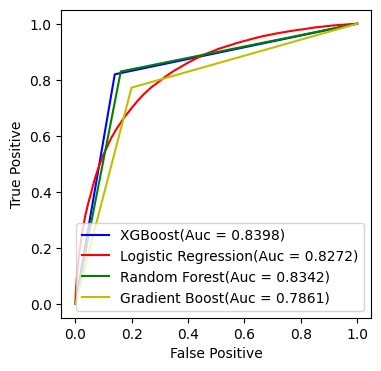

In [31]:
from sklearn.metrics import roc_curve, auc

xg_fp, xg_tp, threshold = roc_curve(ytest, y_xg_roc)
xg_auc = auc(xg_fp, xg_tp)

log_fp, log_tp, threshold = roc_curve(ytest, y_log_roc)
log_auc = auc(log_fp, log_tp)

rfc_fp, rfc_tp, threshold = roc_curve(ytest, y_rfc_roc)
rfc_auc = auc(rfc_fp, rfc_tp)

gb_fp, gb_tp, threshold = roc_curve(ytest, y_gb_roc)
gb_auc = auc(gb_fp, gb_tp)

plt.figure(figsize=(4,4))
plt.plot(xg_fp,  xg_tp, color='b',  label = "XGBoost(Auc = %0.4f)" % xg_auc)
plt.plot(log_fp, log_tp, color='r', label = "Logistic Regression(Auc = %0.4f)" % log_auc)
plt.plot(rfc_fp, rfc_tp, color='g', label = "Random Forest(Auc = %0.4f)" % rfc_auc)
plt.plot(gb_fp, gb_tp, color='y', label = "Gradient Boost(Auc = %0.4f)" % gb_auc)

plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend()

plt.show()

##### Step six - ii: Modelling using Artificial Neural Network

In [32]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(10,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss      = 'binary_crossentropy',
    metrics   = ['accuracy']
)

model.fit(xtrain_pca, ytrain, epochs=5)

Epoch 1/5
9875/9875 [==============================] - 17s 2ms/step - loss: 0.4946 - accuracy: 0.7658
Epoch 2/5
9875/9875 [==============================] - 16s 2ms/step - loss: 0.4733 - accuracy: 0.7803
Epoch 3/5
9875/9875 [==============================] - 24s 2ms/step - loss: 0.4701 - accuracy: 0.7823
Epoch 4/5
9875/9875 [==============================] - 17s 2ms/step - loss: 0.4684 - accuracy: 0.7835
Epoch 5/5
9875/9875 [==============================] - 17s 2ms/step - loss: 0.4675 - accuracy: 0.7844


In [33]:
print(model.evaluate(xtest_pca, ytest))

yp = model.predict(xtest_pca)
y_pred = []
for i in yp:
  if i > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

print(classification_report(ytest, y_pred))

4232/4232 [==============================] - 6s 1ms/step - loss: 0.4678 - accuracy: 0.7839
[0.4678153693675995, 0.7838528156280518]
4232/4232 [==============================] - 5s 1ms/step
              precision    recall  f1-score   support

           0       0.79      0.78      0.78     67694
           1       0.78      0.79      0.79     67723

    accuracy                           0.78    135417
   macro avg       0.78      0.78      0.78    135417
weighted avg       0.78      0.78      0.78    135417



#### Step six - iii: Model Deployment

In [34]:
#Save the model using joblib and deploy the saved model on streamlit

!pip install joblib
import joblib

joblib.dump(rfc_model, 'loan_default_prediction.joblib')

['loan_default_prediction.joblib']